# Week 6 Coding HW- Final HW 
## ADAN 7603 Alice Tang

Instructions: 
Final HW: We will be using a IBM HR analytics dataset that was published in Kaggle that captures synthetic employee data in a company.  Employees leave an organization for a variety of reasons and the goal is to predict the "Attrition" variable. Build a neural network model using a Jupyter notebook using Keras/TensorFlow2. 

First, we will load the dataset.

In [108]:
# Import needed packages.
import pandas as pd

# Provide file path to dataset.
file_path = r"C:\Users\alice\Downloads\archive (4)\WA_Fn-UseC_-HR-Employee-Attrition.csv"

# Load the dataset.
data = pd.read_csv(file_path)

Before we dive into creating our model, we will need to gain a better understanding of our data. Let's start off by checking for missing values in the data.

In [109]:
# Checking for missing values.
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Great! We do not have any missing values to handle. We can start printing a simple summary statistics of the overall dataset. 

In [110]:
# Import needed packages.
import matplotlib.pyplot as plt
import seaborn as sns

# Now to print the summary statistics. 
print(data.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

### From these summary statistics, we can take away a few key points. 
The mean age of employees is 36.92 years and the standard deviation is 9.14, so there is a bit of variabiliy in ages. In terms of daily rate, the mean daily rate is around 802.49. However, the standard deviation is 403.51- indicating a wide range of daily rates. The mean distance from home is 9.19, and the standard deviation is around 8.11, showing some variability. For education levels, the mean education level is 2.91. Based on encoding, this level is between "College" and "Bachelor". 

Let's visualize some of these features so we can gain a more detailed understanding of the distributions and patterns in the data. We will start off by visualizing the numerical features in our dataset.

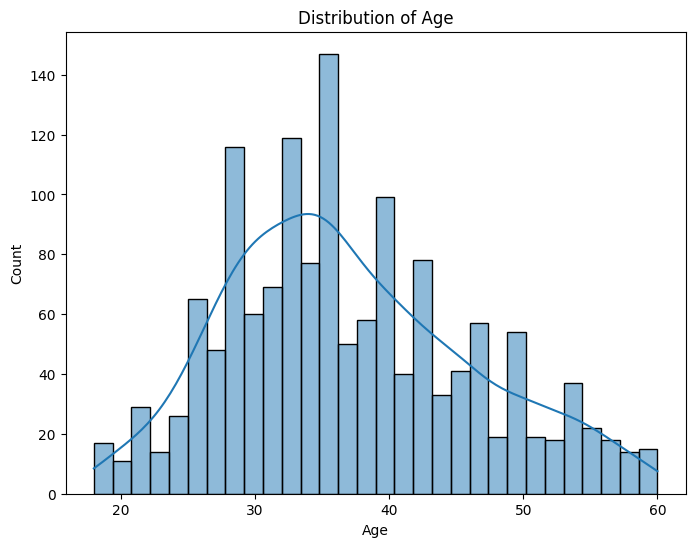

In [111]:
# Plotting a histogram for Age.
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

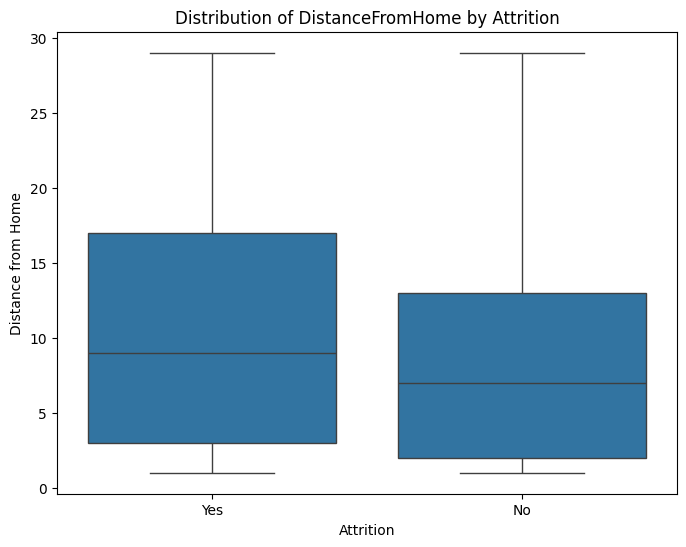

In [112]:
# Creating a boxplot for DistanceFromHome variable.
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='DistanceFromHome', data=data)
plt.title('Distribution of DistanceFromHome by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Distance from Home')
plt.show()


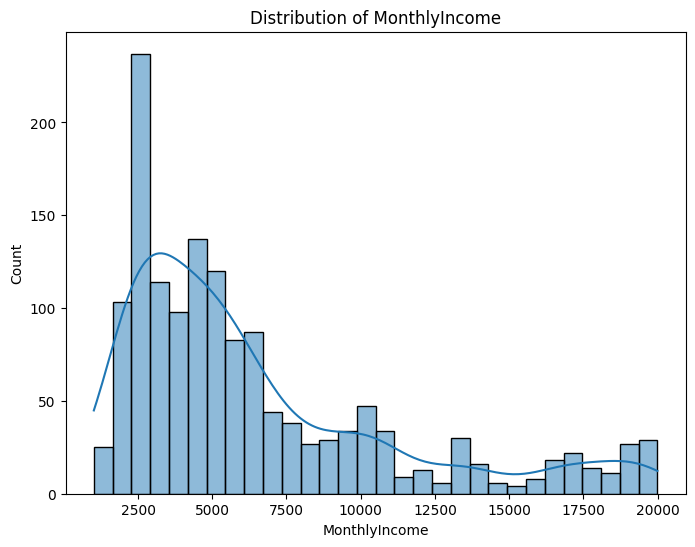

In [113]:
# Plotting a histogram for MonthlyIncome.
plt.figure(figsize=(8, 6))
sns.histplot(data['MonthlyIncome'], bins=30, kde=True)
plt.title('Distribution of MonthlyIncome')
plt.show()


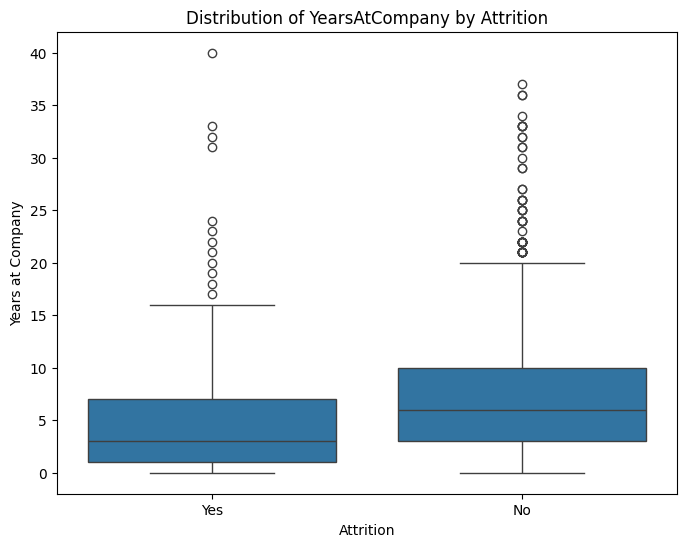

In [114]:
# Creating a Box plot for YearsAtCompany.
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='YearsAtCompany', data=data)
plt.title('Distribution of YearsAtCompany by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Years at Company')
plt.show()

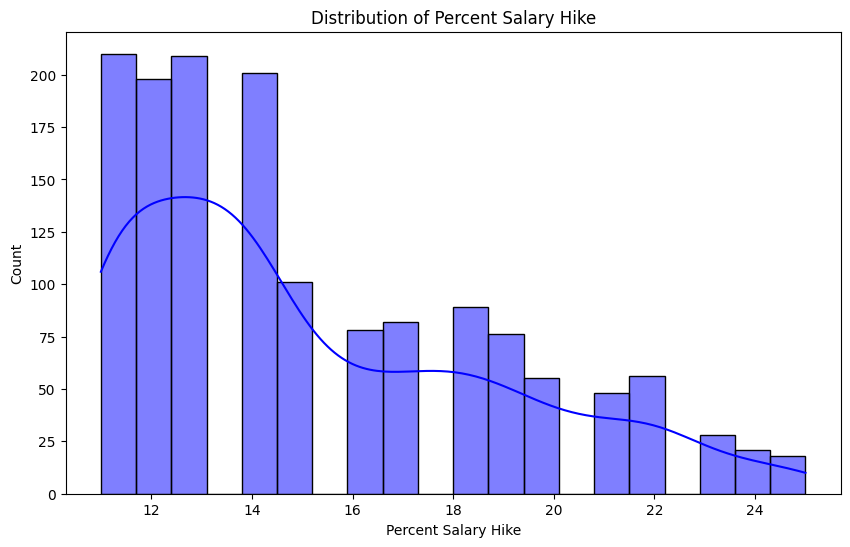

In [115]:
# Histogram for PercentSalaryHike
plt.figure(figsize=(10, 6))
sns.histplot(data['PercentSalaryHike'], bins=20, kde=True, color='blue')
plt.title('Distribution of Percent Salary Hike')
plt.xlabel('Percent Salary Hike')
plt.ylabel('Count')
plt.show()

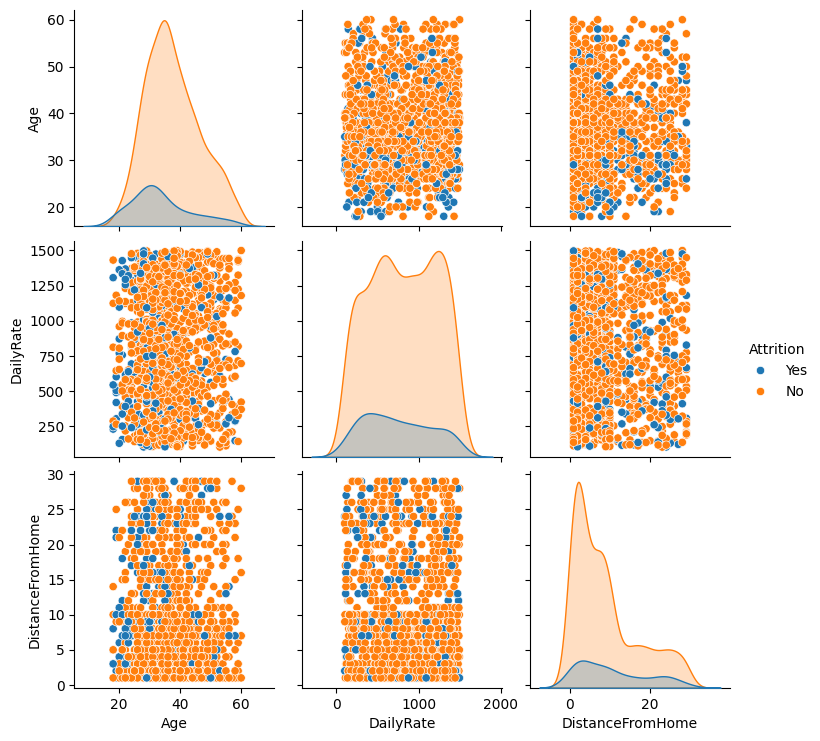

In [116]:
# Creating a pair plot for numerical features with attrition in mind.
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome']
sns.pairplot(data[numerical_features + ['Attrition']], hue='Attrition')
plt.show()

#### Using visualization gives us a better idea of the variables, and we can see how it aligns with our overall summary statistics. Since our ultimate goal is predicting what leads to attribution, I'm going to explore and visualize the categorical features in context of the problem at hand.

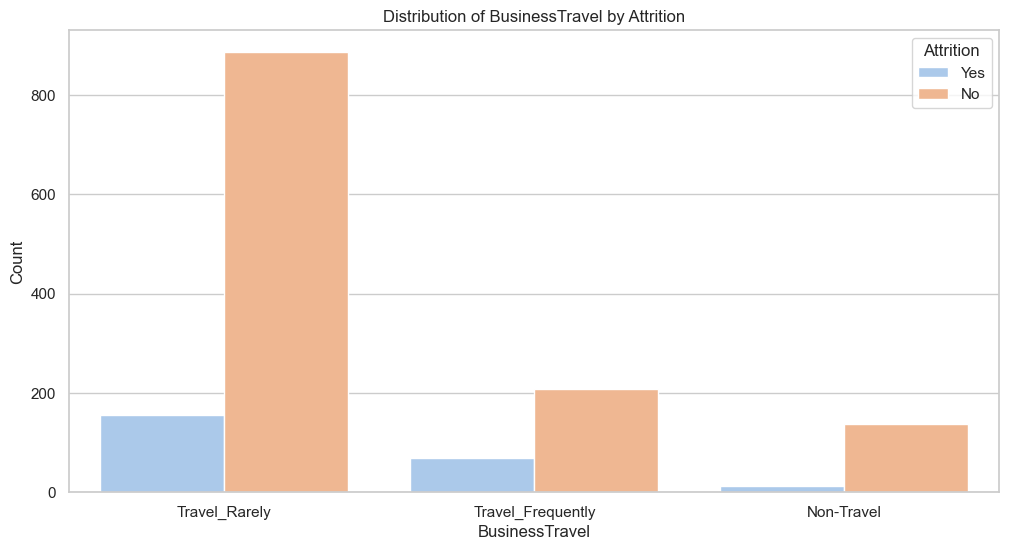

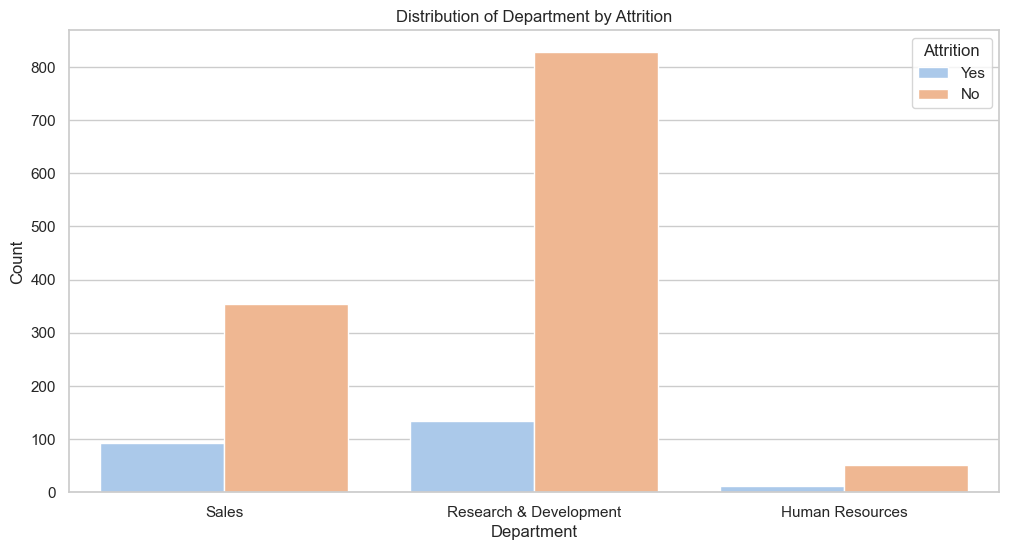

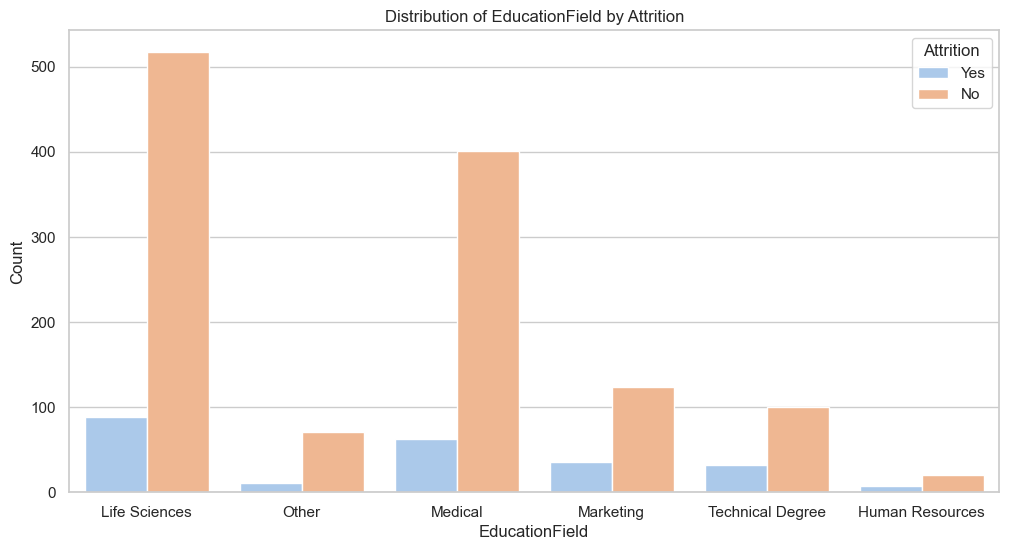

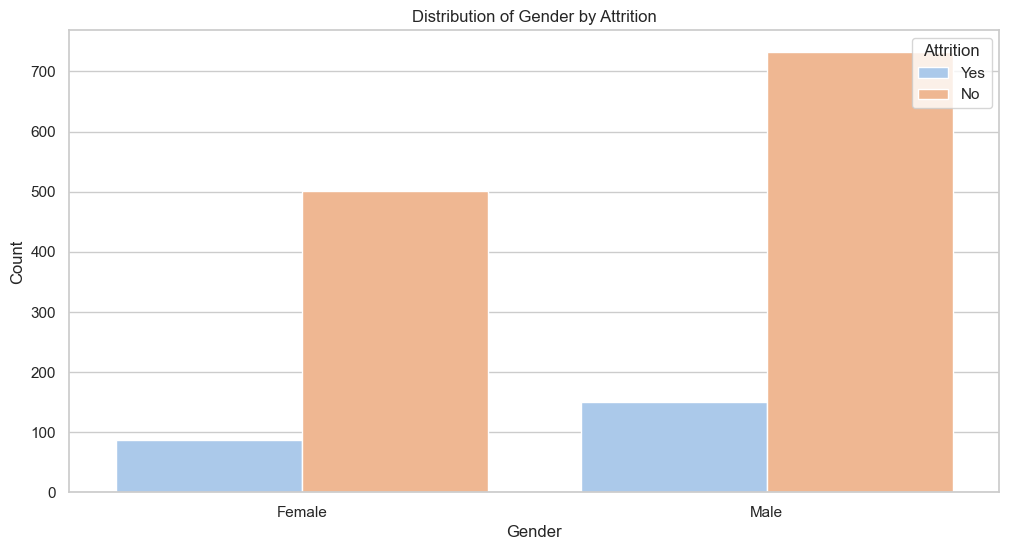

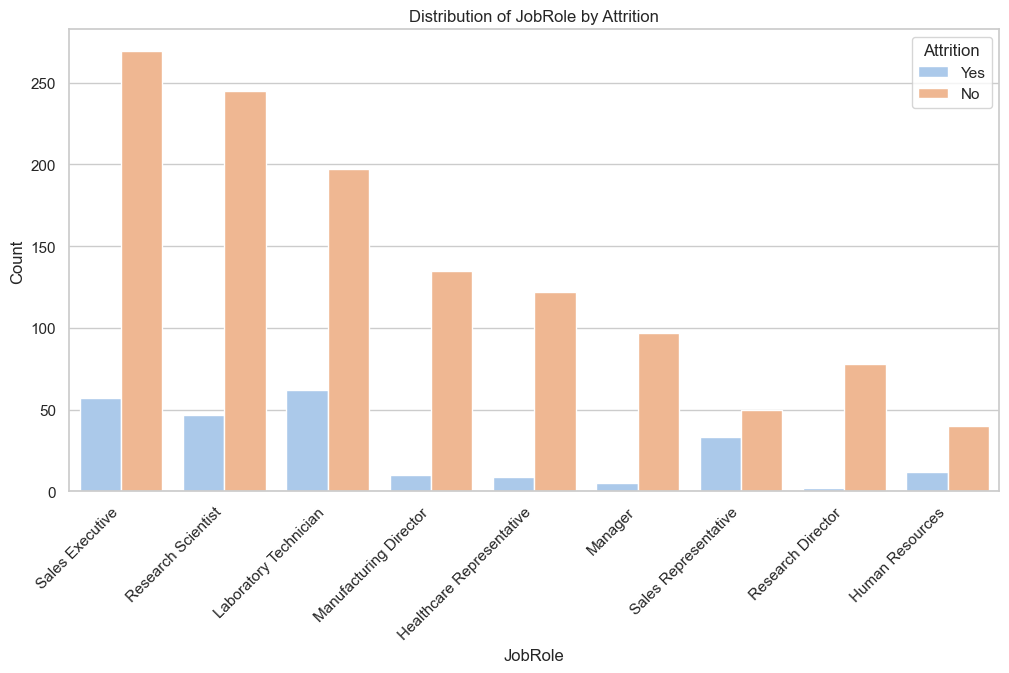

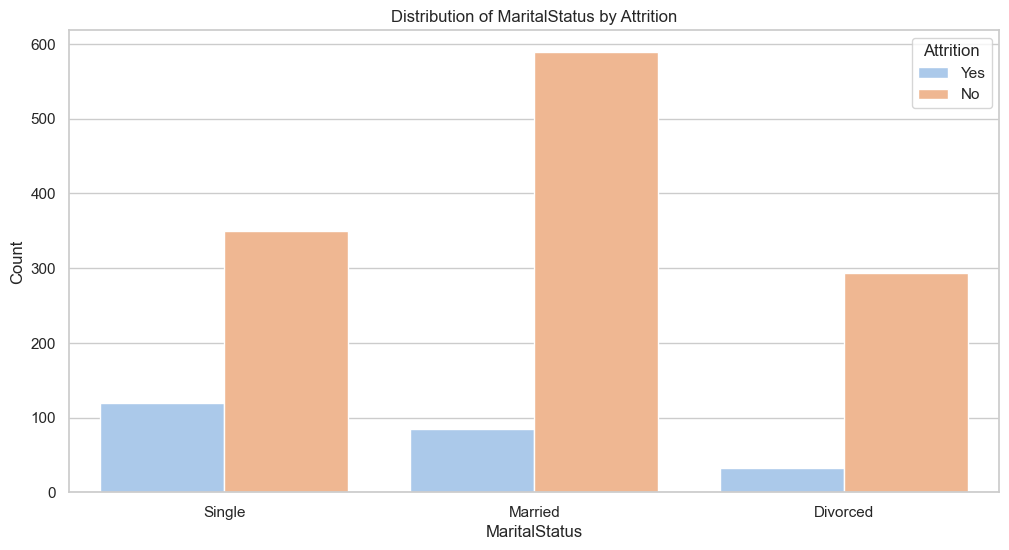

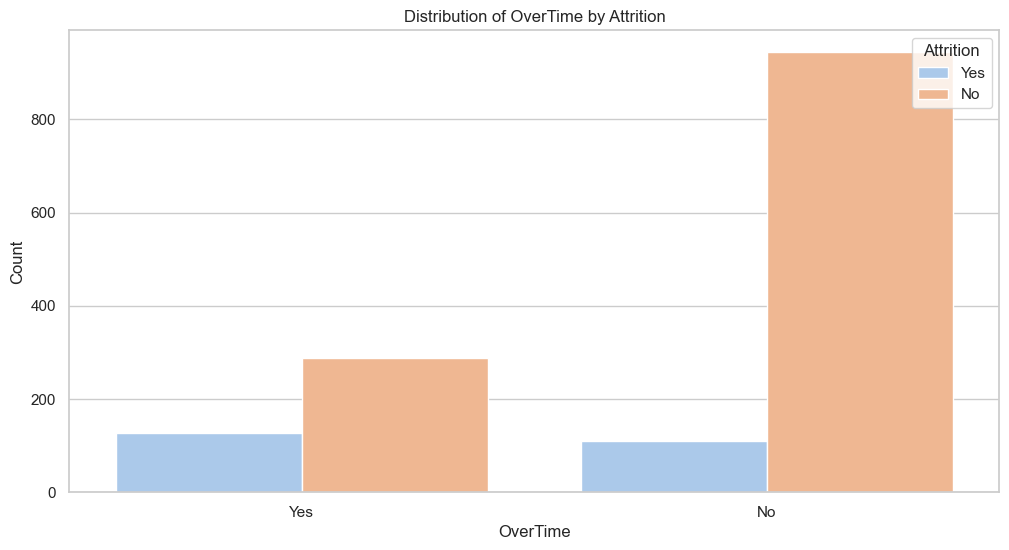

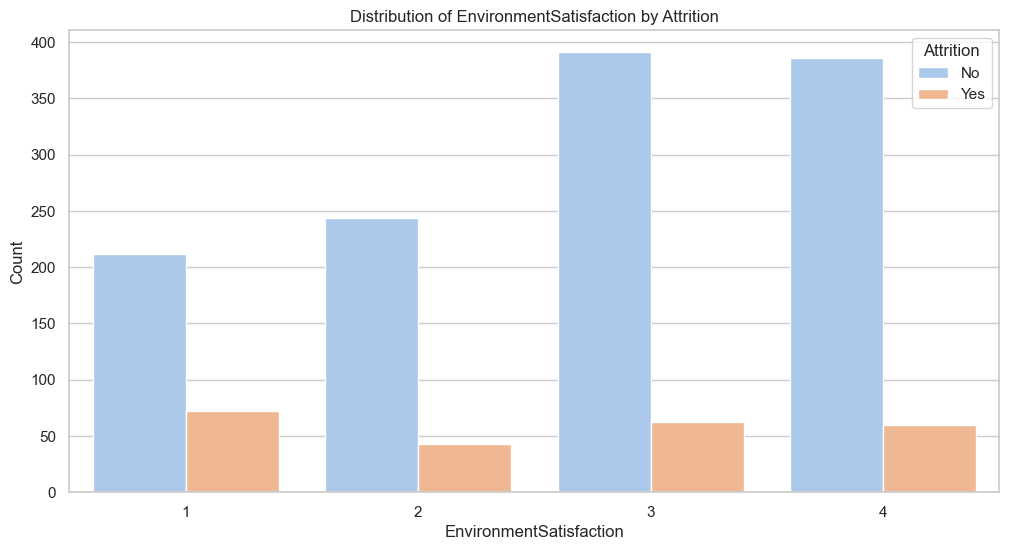

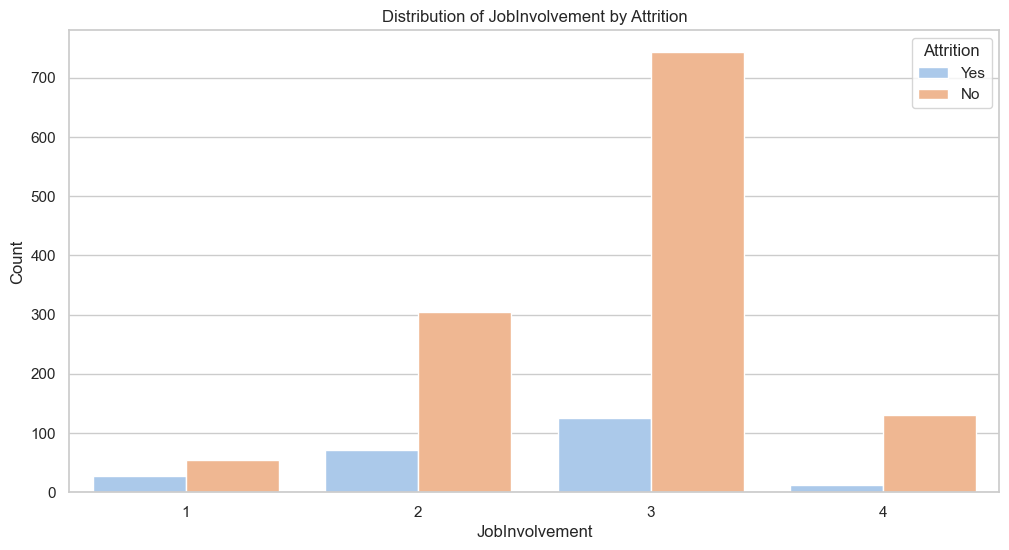

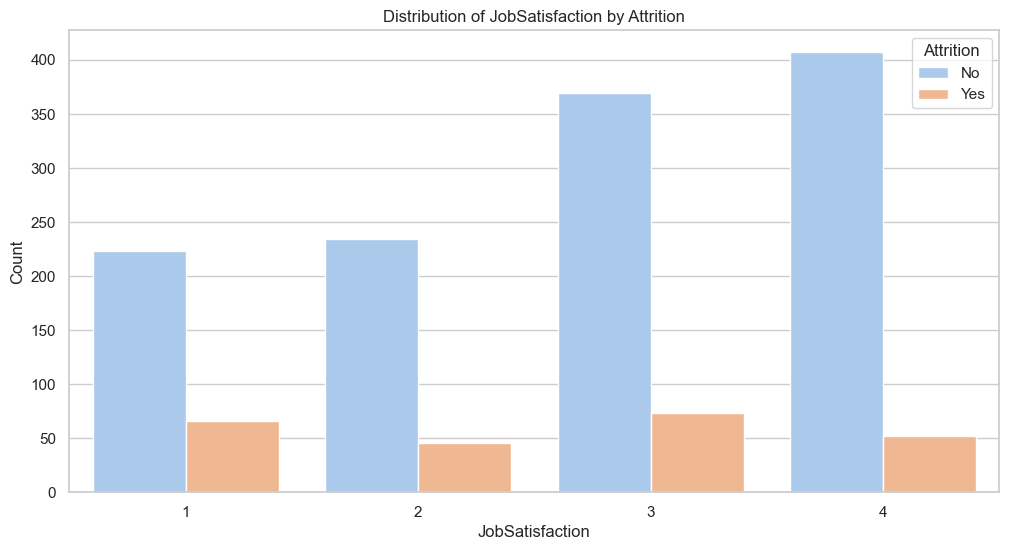

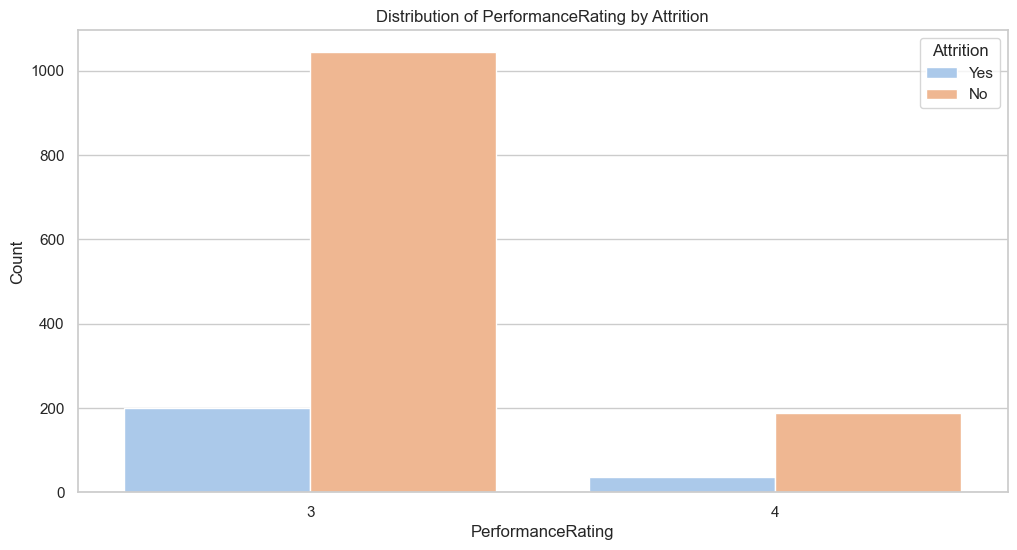

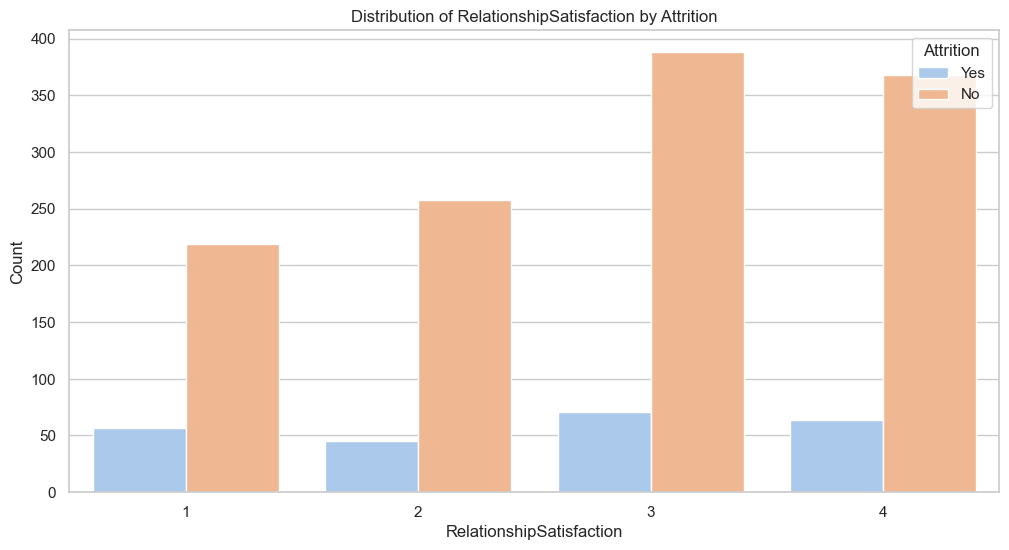

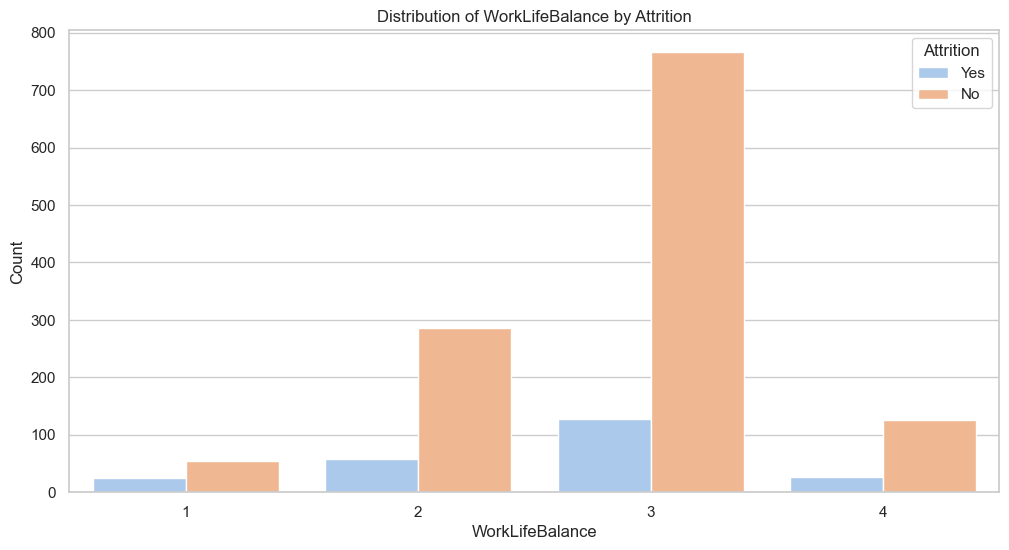

In [117]:
# Style preference, but I'll set the style for the plots to "whitegrid".
sns.set(style="whitegrid")

# This time, I'm going to create a function that creates the bar plots all at once. 
def plot_categorical(feature):
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, hue='Attrition', data=data, palette='pastel')
    plt.title(f'Distribution of {feature} by Attrition')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Attrition', loc='upper right')
    
    # I noticed that for the "Distribution of Job Role" plot, the x-axis labels were overlapping. So I'm going to rotate x-axis labels only for that specific plot.
    if feature == 'JobRole':
        plt.xticks(rotation=45, ha='right')
    
    plt.show()

# Plotting all categorical features now.
all_categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime',
                             'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating',
                             'RelationshipSatisfaction', 'WorkLifeBalance']

for feature in all_categorical_features:
    plot_categorical(feature)


#### From these models, we can see that the number of "Yes" in Attrition is much higher than "No". So let's check the distribution of "Yes" and "No" in the Attrition column

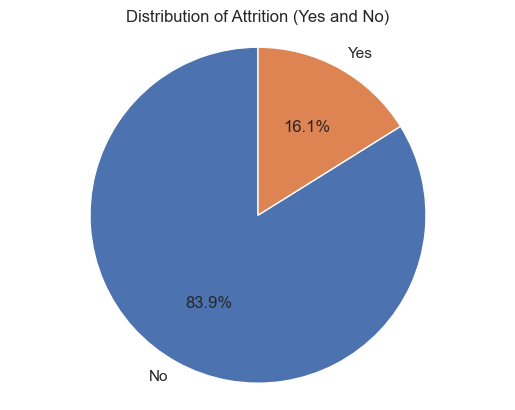

In [118]:
# Defining labels.
labels = data['Attrition'].value_counts().index

# Defining sizes.
sizes = data['Attrition'].value_counts().values

# Plot the pie chart.
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Using "equal" will make the pie chart look circular. 
plt.title('Distribution of Attrition (Yes and No)')
plt.show()

##### As we suspected, "Attrition" is heavily imbalanced. Around 84% is "No" and only 16% is "Yes". Let's make sure to keep this in mind before we create our neural network model. 

### After visualizing and gaining a better idea of our data, we are ready to take steps to prepare the data preprocessing. 

#### We are dealing with multiple categorical variables, and we need to convert these categorical variables into a binary matrix format since the model expects features to be in numerical form. 
##### With label encoding, we assign a unique integer to each category within a categorical variable. This can be a useful way to handle encoding if there is an ordinal relationship between categories. For instance, if the categories have a clear order like "low", "medium", or "high" label encoding can be a very valuable tool in the representation of this order. 

In [23]:
# Import needed packages.
from sklearn.preprocessing import LabelEncoder

# We are applying label encoding on the specified feature, which will then transform the values into numerical labels. 
def transform(feature):
    le=LabelEncoder()
    data[feature]=le.fit_transform(data[feature])
    print(le.classes_) # We're going to print after, since it will help with how labels are mapped to the original categories.

In [24]:
# We will not create a new dataframe including only categorical columns. We set the "include" parameter to "object" which will refer to columns that contain categorical data.
cat_df=data.select_dtypes(include='object')
cat_df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [25]:
# Now, we're applying a loop that will iterate through each column in the cat_df we just created. This will then perform label encoding on each column, and convert categorical values to numerical labels. 
for col in cat_df.columns:
    transform(col)

['No' 'Yes']
['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['Y']
['No' 'Yes']


### Okay! We have officially encoded our categorical variables. We are going to scale our data before creating our neural network model. 
#### This is because neural networks are sensitive to the scale of the features. We will use the StandardScaler tool from the scikit library for this.

In [26]:
# Importing needed packages.
from sklearn.preprocessing import StandardScaler

# Initialize the scaller.
scaler = StandardScaler()

# Create a new dataframe that will be scaled using "fit_transform" of StandardScaler. This new dataframe will not include the "Attrition" column.
scaled_df = scaler.fit_transform(data.drop('Attrition', axis=1))

# We'll define X and Y here, so when we create our models it will be an easier way to call upon it!
X = scaled_df # Assigned the scaled_df we just created.
Y = data['Attrition'].values # Assigned the values of the "Attrition" column from the original dataframe we had.

### One more thing... We have not encoded all of our categorical variables yet. 
#### We will need to one-hot encode the target variable "Attrition" before we create our model. In turn, this will make our target variable suitable for training our neural network model.

In [27]:
# Importing needed packages.
from tensorflow.keras.utils import to_categorical

# Converting our target variable we defined earlier (aka "Attrition") to an OHE format.
Y=to_categorical(Y)

# Let's check to make sure the OHE was performed correctly...
Y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

### Great! The one-hot encoding was performed successfully. 
#### We are now ready to split our dataset into training and testing. 

In [28]:
# Importing needed packages.
from sklearn.model_selection import train_test_split

# Splitting the data into 75/25 for training and testing. We set the random_state to 42 here to ensure reproducibility of results.
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

### Before we go any further... something really important we have to consider is the proportion of our data.
#### We can see that from visualizing "Attrition" earlier, we notice that the majority of our observations is "No", indicating an imbalanced dataset. We should address this before creating our model, otherwise it will inevitably affect our model's performance and lead to biased results.
##### To handle this, let's use an oversampling technique called "SMOTE". Essentially, "SMOTE" creates synthetic samples for the minority class, which can foster diversity in the minority class. This will ensure that our model is trained on a more balanced representation of data. 

In [30]:
# Importing needed packages.
from imblearn.over_sampling import SMOTE

# Use random_state for reproducibility.
oversampler = SMOTE(random_state=42)
X_train_smote, y_train_smote = oversampler.fit_resample(X_train, y_train) # This creates a new set of training data, which creates a balanced distribution of the target classes. 

In [31]:
import tensorflow as tf
import numpy as np
import random

# Set the seed for each library.
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### Now we are ready to build the Keras model. 
#### Let's take the steps to do so. 

In [78]:
# Import needed packages.
from keras.models import Sequential
from keras.layers import Dense

# Calculating the input dimension which is based on the number of features in training data ("X_train").
input_dimension = X_train.shape[1]

# Let's create the model now.
model = Sequential() # Initialize sequential model. 
model.add(Dense(input_dim=input_dimension, units=8, activation='relu')) # Adding the first layer to the model. 
model.add(Dense(units=16, activation='relu')) # Adding the second dense layer. 
model.add(Dense(units=2, activation='sigmoid')) # Adding the third dense layer. This output layer often uses a sigmoid activation for binary classification problems.

In [79]:
# Import needed packages.
from tensorflow.keras.optimizers import Adam

# Compile the model in order to configure the model for training. We'll use the Adam optimizer with a learning rate of 0.01. 
model.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy']) # "binary_crossentropy" is commonly used for binary classification problems as well.

In [80]:
# Let's check the model summary. 
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 8)                 280       
                                                                 
 dense_19 (Dense)            (None, 16)                144       
                                                                 
 dense_20 (Dense)            (None, 2)                 34        
                                                                 
Total params: 458 (1.79 KB)
Trainable params: 458 (1.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
# Training the model. 
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,verbose=1) 

Epoch 1/10
35/35 [==============================] - 1s 4ms/step - loss: 0.4699 - accuracy: 0.8267 - val_loss: 0.3635 - val_accuracy: 0.8696
Epoch 2/10
35/35 [==============================] - 0s 2ms/step - loss: 0.3817 - accuracy: 0.8285 - val_loss: 0.3493 - val_accuracy: 0.8696
Epoch 3/10
35/35 [==============================] - 0s 2ms/step - loss: 0.3589 - accuracy: 0.8285 - val_loss: 0.3422 - val_accuracy: 0.8696
Epoch 4/10
35/35 [==============================] - 0s 2ms/step - loss: 0.3480 - accuracy: 0.8394 - val_loss: 0.3409 - val_accuracy: 0.8804
Epoch 5/10
35/35 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8621 - val_loss: 0.3427 - val_accuracy: 0.8832
Epoch 6/10
35/35 [==============================] - 0s 2ms/step - loss: 0.3228 - accuracy: 0.8639 - val_loss: 0.3484 - val_accuracy: 0.8696
Epoch 7/10
35/35 [==============================] - 0s 2ms/step - loss: 0.3097 - accuracy: 0.8784 - val_loss: 0.3469 - val_accuracy: 0.8940
Epoch 8/10
35/35 [==

In [82]:
# Predict the probability of each class for each sample. 
y_pred_prob = model.predict(X_test)

# Create y_pred_classes which will have the predicted classes for each sample in our testing dataset.
y_pred_classes = np.argmax(y_pred_prob, axis=1)

# Print the results.
print("Predicted Classes:", y_pred_classes)

12/12 [==============================] - 0s 652us/step
Predicted Classes: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]


#### Great! Let's calculate the metrics now. 

In [83]:
# Import needed packages.
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# We're going to extract the second column of y_test so we can get a 1D array of binary labels.
y_test_binary = y_test[:, 1]

# Calculate the accuracy.
accuracy = accuracy_score(y_test_binary, y_pred_classes)
print("Accuracy:", accuracy)

# Calculate the precision.
precision = precision_score(y_test_binary, y_pred_classes)
print("Precision:", precision)

# Calculate the recall.
recall = recall_score(y_test_binary, y_pred_classes)
print("Recall:", recall)

# Calculate the AUC.
auc = roc_auc_score(y_test_binary, y_pred_classes)
print("AUC:", auc)

# Calculate the confusion matrix.
conf_matrix = confusion_matrix(y_test_binary, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8695652173913043
Precision: 0.5
Recall: 0.3541666666666667
AUC: 0.6505208333333333
Confusion Matrix:
[[303  17]
 [ 31  17]]


#### Okay, let's do some more hyperparameter tuning. We used all of the features in the previous model, but I'm curious to see how and if we can improve the model by doing Recursive Feature Elimination (RFE) to select the most important features in the dataset. 

##### So let's create another model using a select number of features, and see how it compares.

In [98]:
# Import needed packages.
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras import regularizers

# We will be using the same split of training and testing data.  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Creating an instance of RandomForestClassifier(), and this model will be used for feature selection. 
model_rf = RandomForestClassifier()

# We're selecting how many features we want in our model. 
selector = RFE(estimator=model_rf, n_features_to_select=24)  # I played around with this earlier by testing out a different number of features, and 24 gave me the good results.

# Fit the RFE mode. 
selector = selector.fit(X_train, y_train)

# Getting the selected features and storing them in X_train_selected and X_test_selected. We have a reduced number of features (24) compared to the full set (31) now. Hopefully this can help us with improving our results.
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

In [99]:
# X_train_selected is our input data here from the features the RFE model selected. 
input_dimension = X_train_selected.shape[1]

# Let's recreate the Keras model we did before, but with these new dimensions! 
model2 = Sequential()

# We'll add these dense layers but with regularization!
model2.add(Dense(input_dim=input_dimension, units=8, activation='relu', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model2.add(Dense(units=16, activation='relu', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model2.add(Dense(units=2, activation='sigmoid', bias_initializer='zeros'))  # We're setting the bias_initializer to "zeros" which helps with output biases. 

In [100]:
# Let's train the model again.
model2.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train_selected, y_train, validation_data=(X_test_selected, y_test), epochs=10, verbose=1)

Epoch 1/10
35/35 [==============================] - 1s 4ms/step - loss: 0.6498 - accuracy: 0.8067 - val_loss: 0.4472 - val_accuracy: 0.8696
Epoch 2/10
35/35 [==============================] - 0s 2ms/step - loss: 0.4583 - accuracy: 0.8285 - val_loss: 0.4029 - val_accuracy: 0.8696
Epoch 3/10
35/35 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.8285 - val_loss: 0.3913 - val_accuracy: 0.8696
Epoch 4/10
35/35 [==============================] - 0s 2ms/step - loss: 0.4038 - accuracy: 0.8285 - val_loss: 0.3876 - val_accuracy: 0.8696
Epoch 5/10
35/35 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.8285 - val_loss: 0.3763 - val_accuracy: 0.8696
Epoch 6/10
35/35 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.8285 - val_loss: 0.3904 - val_accuracy: 0.8696
Epoch 7/10
35/35 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.8285 - val_loss: 0.3698 - val_accuracy: 0.8696
Epoch 8/10
35/35 [==

In [87]:
# Let's show the selected features. 
selected_features = np.array(data.columns)[:-1][selector.support_]

# Print the results.
print("Selected Features:", selected_features)

Selected Features: ['Age' 'BusinessTravel' 'Department' 'Education' 'EmployeeCount'
 'EmployeeNumber' 'Gender' 'JobLevel' 'JobRole' 'JobSatisfaction'
 'MaritalStatus' 'MonthlyIncome' 'MonthlyRate' 'Over18' 'OverTime'
 'PerformanceRating' 'StandardHours' 'StockOptionLevel'
 'TotalWorkingYears' 'TrainingTimesLastYear' 'WorkLifeBalance'
 'YearsAtCompany' 'YearsInCurrentRole' 'YearsSinceLastPromotion']


In [101]:
# Defining the selected features. 
selected_features = ['Age', 'BusinessTravel', 'Department', 'Education', 'EmployeeCount',
                       'EmployeeNumber', 'Gender', 'JobLevel', 'JobRole', 'JobSatisfaction',
                       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'Over18', 'OverTime',
                       'PerformanceRating', 'StandardHours', 'StockOptionLevel',
                       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion']
# Create a new DataFrame with only the selected features
df_selected = data[selected_features]

# Print or use df_selected as needed
print(df_selected.head())

   Age  BusinessTravel  Department  Education  EmployeeCount  EmployeeNumber  \
0   41               2           2          2              1               1   
1   49               1           1          1              1               2   
2   37               2           1          2              1               4   
3   33               1           1          4              1               5   
4   27               2           1          1              1               7   

   Gender  JobLevel  JobRole  JobSatisfaction  ...  OverTime  \
0       0         2        7                4  ...         1   
1       1         2        6                2  ...         0   
2       1         1        2                3  ...         1   
3       0         1        6                3  ...         1   
4       1         1        2                2  ...         0   

   PerformanceRating  StandardHours  StockOptionLevel  TotalWorkingYears  \
0                  3             80                 0     

We'll repeat the steps from before.

In [102]:
scaler = StandardScaler()
scaled_df2 = scaler.fit_transform(df_selected)
X2 = scaled_df2
Y2 = data['Attrition'].values

In [103]:
Y2=to_categorical(Y2)
Y2

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [104]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,Y2,test_size=0.25,random_state=42)

In [105]:
oversampler = SMOTE(random_state=42)
X_train_smote2, y_train_smote2 = oversampler.fit_resample(X2_train, y2_train)

In [106]:
# Making predictions on the data.
y_pred_prob2 = model2.predict(X2_test)
y_pred_classes2 = np.argmax(y_pred_prob2, axis=1)

# Print the results.
print("Predicted Classes:", y_pred_classes2)

12/12 [==============================] - 0s 729us/step
Predicted Classes: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


In [107]:
# Converting OHE format to binary format.
y2_test_binary = np.argmax(y2_test, axis=1)

# Calculating the metrics.
accuracy2 = accuracy_score(y2_test_binary, y_pred_classes2)
precision2 = precision_score(y2_test_binary, y_pred_classes2)
recall2 = recall_score(y2_test_binary, y_pred_classes2)
roc_auc2 = roc_auc_score(y2_test_binary, y_pred_classes2)
conf_matrix2 = confusion_matrix(y2_test_binary, y_pred_classes2)

# Printing the metrics.
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("ROC AUC:", roc_auc2)
print("Confusion Matrix:")
print(conf_matrix2)

Accuracy: 0.8831521739130435
Precision: 0.7272727272727273
Recall: 0.16666666666666666
ROC AUC: 0.5786458333333333
Confusion Matrix:
[[317   3]
 [ 40   8]]


### If we compare the evaluation metrics of both models, the first one with all features (31 features) versus the second one with selected features (24 features), the model with 24 selected features outperformed in a few aspects. 

#### The model with 24 selected features has higher accuracy and precision, which means there are fewer false positives. On the other hand, the model with the full set of features has higher recall, which indicates better performance in capturing positive instances. The model with full set of features has a higher AUC as well, which provides an overall better performance in distinguishing between classes.

#### Essentially, with the full set of features and the 24 selected features model there is a trade-off between the different evaluation metrics. In the future, picking a specific model will depend on which metric is more important for your specific case. In that case, you can pick your preferred model based on a chosen metric.

##### However, it is worthy to note that feature selection is incredibly important in identifying the most relevant features for the task. If using a subset of features is employed, the model can potentially generalize better to new and unseen data. Additionally, a model with more features runs a higher risk of overfitting to the training data (especially when you have limited data), which can be problematic for a variety of reasons. 